In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import tree

In [17]:
col = ['BI_RADS','age','shape', 'margin', 'density', 'severity']
df = pd.read_csv("mammographic_masses.data.txt", names=col, header=None, na_values={'BI_RADS':'?','age':'?','shape':'?', 'margin':'?', 'density':'?', 'severity':'?'})
df.head()

,BI_RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [18]:
df = df.dropna()

In [19]:
features = ['age', 'shape', 'margin','density']
classes = 'severity'

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df[classes], test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
x = X_train.values
g = X_test.values
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
X_train = pd.DataFrame(scaled)
scaled = scaler.fit_transform(g)
X_test = pd.DataFrame(scaled)
X_train

,0,1,2,3
0,-2.352407,0.160291,-1.168098,0.24625
1,-0.091109,0.970868,0.752317,0.24625
2,0.799706,0.970868,0.752317,0.24625
3,0.182988,-1.460863,-1.168098,0.24625
4,-0.228157,0.160291,1.392455,0.24625
...,...,...,...,...
617,-0.707826,-0.650286,0.752317,0.24625
618,1.347899,0.970868,0.752317,0.24625
619,0.525609,0.970868,0.752317,0.24625
620,-0.228157,-1.460863,-1.168098,0.24625


In [21]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

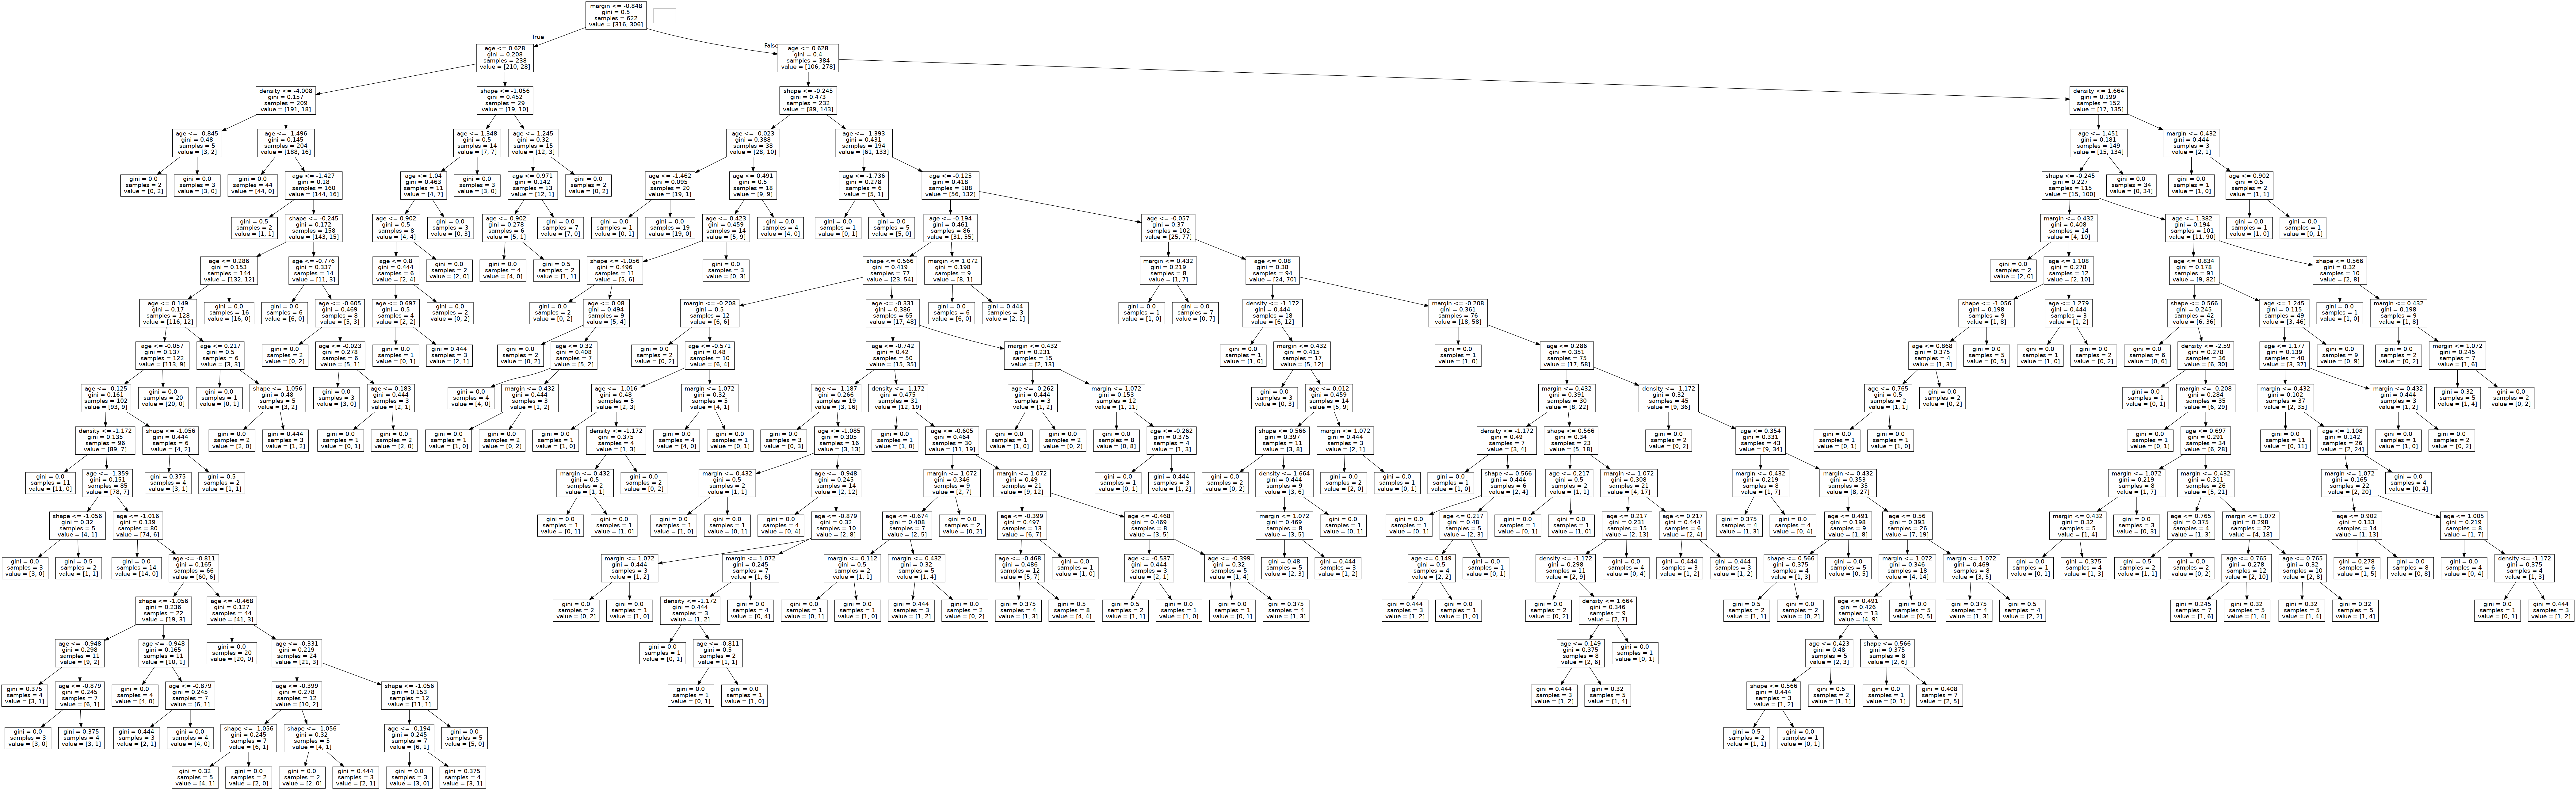

In [22]:
from IPython.display import Image  
from six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [23]:
predictions = clf.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.7451923076923077